## VGG16 based network
This time we will play around with VGG16 model, which has won ImageNet Challenge 2014 for localization. You can find the paper [here](https://arxiv.org/abs/1409.1556)

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Let us first try with small sample of data and later increase the dataset with lot of data. 

Notice the difference. 

In [2]:
import os
import numpy as np
import keras
from keras.models import Sequential 
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import * 
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

from keras.preprocessing import image


TRAIN = 'sample-dog-cat/train'
VALID = 'sample-dog-cat/valid'
TEST  = 'sample-dog-cat/test'

#TRAIN = 'dogscats/train'
#VALID = 'dogscats/valid'
#TEST  = 'dogscats/test'

# Enable TensorBoard
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
train_batch = ImageDataGenerator().flow_from_directory(TRAIN, target_size=(224,224), classes=['dogs', 'cats'], batch_size=8)
valid_batch = ImageDataGenerator().flow_from_directory(VALID, target_size=(224,224), classes=['dogs', 'cats'], batch_size=4)
test_batch = ImageDataGenerator().flow_from_directory(TEST, target_size=(224,224), classes=['dogs', 'cats'], batch_size=8)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [4]:
os.listdir(TRAIN)

['dogs', 'cats']

In [5]:
file = os.listdir('sample-dog-cat/train/cats/')[0:5]
file

['cat.9021.jpg',
 'cat.9342.jpg',
 'cat.5999.jpg',
 'cat.2784.jpg',
 'cat.9084.jpg']

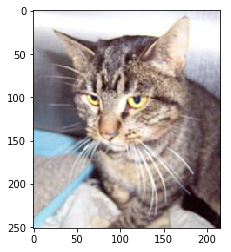

In [6]:
img = plt.imread('sample-dog-cat/train/cats/cat.9021.jpg')
plt.imshow(img);

In [7]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [8]:
imgs, labels = next(train_batch)

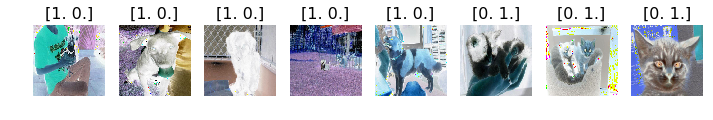

In [9]:
plots(imgs, titles=labels)

In [10]:
vgg_model = keras.applications.vgg16.VGG16(weights='imagenet')

In [11]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [12]:
type(vgg_model)

keras.engine.training.Model

In [13]:
model = Sequential()
for layer in vgg_model.layers:
    model.add(layer)

In [14]:
type(model)

keras.models.Sequential

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [16]:
model.layers.pop()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [17]:
for layer in model.layers:
    layer.trainable = False

In [18]:
model.add(Dense(2, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [19]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=(['accuracy']))

In [20]:
model.fit_generator(train_batch, steps_per_epoch=4, validation_data=valid_batch, validation_steps=4, epochs=3, verbose=2, callbacks=[tbCallBack])

Epoch 1/3
 - 28s - loss: 0.6872 - acc: 0.7812 - val_loss: 0.6923 - val_acc: 0.5000
Epoch 2/3
 - 27s - loss: 0.6812 - acc: 0.9062 - val_loss: 0.6865 - val_acc: 0.8750
Epoch 3/3
 - 27s - loss: 0.6766 - acc: 1.0000 - val_loss: 0.6814 - val_acc: 0.8750


In [ ]:
tst_imgs, tst_labels = next(test_batch)

In [ ]:
plots(tst_imgs, titles=tst_labels)

In [ ]:
tst_labels = tst_labels[:,0]
tst_labels

In [ ]:
predictions = model.predict_generator(test_batch, steps=1, verbose=0)

In [ ]:
predictions

In [ ]:
cm = confusion_matrix(tst_labels, np.round(predictions[:,0]))

In [ ]:
cm_plot_labels = ['cats', 'dogs']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
plot_confusion_matrix(cm, cm_plot_labels, title='confusion_matrix')